In [1]:
import os

import dtreeviz
import joblib
import pandas as pd
from graphviz import Source
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from tools.common_methods import get_train_test_data, print_results

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [2]:
X_train, X_test, y_train, y_test = get_train_test_data()

In [3]:
decision_tree = DecisionTreeRegressor(random_state=1)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

print_results(y_test, y_pred)

MSE: 133.23851590106008 	R2 score: 0.9141329161159645


parameters = {"max_depth": np.arange(2, 30, 2),
              "min_samples_leaf": np.arange(1, 20),
              "max_features": ["log2", "sqrt", 15, 20, 22, None],
              "max_leaf_nodes": [None, 50, 100, 200, 300, 500, 1000]}

computation time: 2733.53
{'max_depth': 26, 'max_features': 15, 'max_leaf_nodes': 300, 'min_samples_leaf': 2}

mse score: 112.53
r2 score: 0.93

*These results were not reproducible. The R2 varied from 0.87 to 0.94 from time to time.
Worse results were received trying to tune with fixed random_state, so it was decided to leave only the basic model.*

In [4]:
min_mse = 133
best_depth = 0
best_features = 0

for features in range(1, 25):
    for depth in range(1, 1000):
        decision_tree = DecisionTreeRegressor(random_state=1, max_depth=depth, max_features=features)
        decision_tree.fit(X_train, y_train)

        y_pred = decision_tree.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        if mse < min_mse:
            min_mse = mse
            best_depth = depth
            best_features = features

print('Depth:', best_depth, '; features: ', best_features, "; MSE: ", min_mse, sep='')

Depth:19; features: 7; MSE: 93.80876088723575


In [4]:
best_decision_tree = DecisionTreeRegressor(random_state=1, max_depth=19, max_features=7)
best_decision_tree.fit(X_train, y_train)

y_pred = best_decision_tree.predict(X_test)

print_results(y_test, y_pred)

MSE: 93.80876088723575 	R2 score: 0.9395438722377902


In [5]:
joblib.dump(best_decision_tree, '../saved_models/decision_tree.sav')

['../saved_models/decision_tree.sav']

In [7]:
dot_data = export_graphviz(best_decision_tree, feature_names=X_train.columns)

In [8]:
s = Source(dot_data, filename="tree_structure")
s.view()

'tree_structure.pdf'

In [14]:
viz_model = dtreeviz.model(best_decision_tree, X_train, y_train, feature_names=list(X_train.columns.values), target_name="УСЬОГО")
v = viz_model.view()
v.save("dtreeviz_best.svg")

C:\Users\natan.chachko\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


Text(0.5, 1.0, 'Feature Importance')

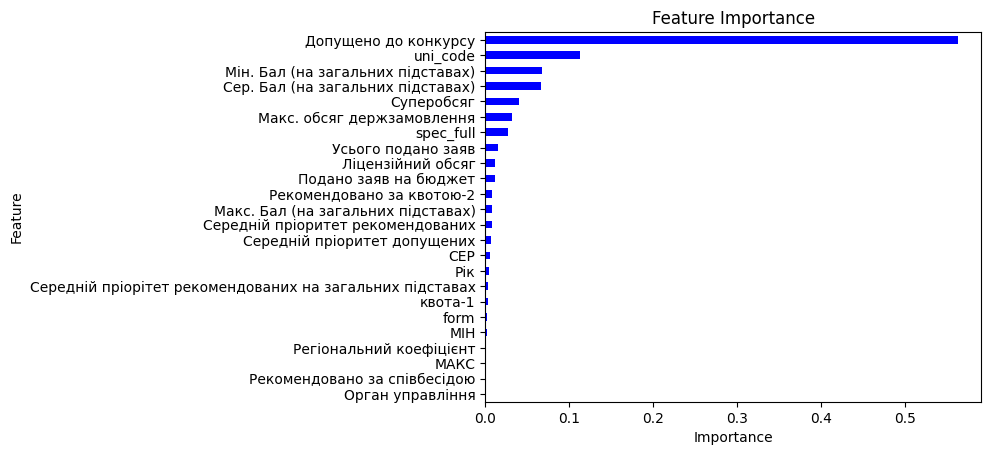

In [10]:
importances = pd.Series(best_decision_tree.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True, inplace=True)
importances.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

In [11]:
importances.sort_values(ascending=False)

Допущено до конкурсу                                        0.562641
uni_code                                                    0.112621
Мін. Бал (на загальних підставах)                           0.067573
Сер. Бал (на загальних підставах)                           0.065788
Суперобсяг                                                  0.039729
Макс. обсяг держзамовлення                                  0.032392
spec_full                                                   0.027500
Усього подано заяв                                          0.015058
Ліцензійний обсяг                                           0.012152
Подано заяв на бюджет                                       0.011446
Рекомендовано за квотою-2                                   0.008347
Макс. Бал (на загальних підставах)                          0.007918
Середній пріоритет рекомендованих                           0.007906
Середній пріоритет допущених                                0.006989
СЕР                               